# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset yang digunakan pada proyek ini adalah Diabetes Health Indicators Dataset, yang dapat ditemukan pada link berikut:  https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data 

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
FILE_NAME = 'diabetes_raw.csv'
FILE_PATH = os.path.join('..', FILE_NAME)

try:
    df = pd.read_csv(FILE_PATH, delimiter=',')
    print(f"Dataset '{FILE_NAME}' berhasil dimuat.")
except FileNotFoundError:
    print(f"ERROR: File '{FILE_PATH}' tidak ditemukan.")
except Exception as e:
     try:
         df = pd.read_csv(FILE_PATH, delimiter=';', encoding='latin1', on_bad_lines='skip')
         print(f"Dataset '{FILE_NAME}' berhasil dimuat (delimiter ';').")
     except Exception as e_inner:
         print(f"Error memuat file: {e_inner}")

Dataset 'diabetes_raw.csv' berhasil dimuat.


In [5]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


### Deskripsi Fitur Dataset

Dataset ini terdiri dari **22 fitur**, dengan penjelasan sebagai berikut:

| Fitur                 | Deskripsi |
|-----------------------|-----------|
| `Diabetes_binary`     | Status diabetes: **0 = tidak diabetes**, **1 = prediabetes/diabetes** |
| `HighBP`              | Tekanan darah tinggi: **0 = tidak**, **1 = ya** |
| `HighChol`            | Kolesterol tinggi: **0 = tidak**, **1 = ya** |
| `CholCheck`           | Pemeriksaan kolesterol dalam 5 tahun terakhir: **0 = tidak**, **1 = ya** |
| `BMI`                 | Indeks Massa Tubuh (Body Mass Index), berupa nilai numerik |
| `Smoker`              | Pernah merokok minimal 100 batang rokok seumur hidup: **0 = tidak**, **1 = ya** |
| `Stroke`              | Pernah diberitahu mengalami stroke: **0 = tidak**, **1 = ya** |
| `HeartDiseaseorAttack`| Riwayat penyakit jantung koroner atau serangan jantung: **0 = tidak**, **1 = ya** |
| `PhysActivity`        | Aktivitas fisik dalam 30 hari terakhir (tidak termasuk pekerjaan): **0 = tidak**, **1 = ya** |
| `Fruits`              | Konsumsi buah 1 kali atau lebih per hari: **0 = tidak**, **1 = ya** |
| `Veggies`             | Konsumsi sayuran 1 kali atau lebih per hari: **0 = tidak**, **1 = ya** |
| `HvyAlcoholConsump`   | Konsumsi alkohol berlebihan (pria ≥14 gelas/minggu, wanita ≥7 gelas/minggu): **0 = tidak**, **1 = ya** |
| `AnyHealthcare`       | Memiliki jaminan kesehatan: **0 = tidak**, **1 = ya** |
| `NoDocbcCost`         | Tidak dapat ke dokter dalam 12 bulan terakhir karena biaya: **0 = tidak**, **1 = ya** |
| `GenHlth`             | Kondisi kesehatan umum (skala 1–5): **1 = sangat baik**, **2 = baik sekali**, **3 = baik**, **4 = cukup**, **5 = buruk** |
| `MentHlth`            | Jumlah hari mengalami gangguan kesehatan mental dalam 30 hari terakhir (skala 1–30 hari) |
| `PhysHlth`            | Jumlah hari mengalami gangguan kesehatan fisik atau cedera dalam 30 hari terakhir (skala 1–30 hari) |
| `DiffWalk`            | Kesulitan serius berjalan atau menaiki tangga: **0 = tidak**, **1 = ya** |
| `Sex`                 | Jenis kelamin: **0 = perempuan**, **1 = laki-laki** |
| `Age`                 | Kategori usia (13 level dalam kelipatan 5 tahun): **1 = 18–24**, **9 = 60–64**, **13 = 80 atau lebih** |
| `Education`           | Tingkat pendidikan (skala 1–6): **1 = tidak sekolah/taman kanak-kanak**, **2 = SD**, **3 = SMP**, **4 = SMA**, **5 = <4 tahun kuliah**, **6 = ≥4 tahun kuliah** |
| `Income`              | Tingkat pendapatan (skala 1–8): **1 = <10.000 USD**, **5 = <35.000 USD**, **8 = ≥75.000 USD** |


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

Dapat dilihat bahwa terdapat 70692 baris dari 22 kolom data numerik, dengan tidak ada data null atau hilang, dan jenis data berupa float64.

In [7]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [8]:
# Cek Missing Values
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Seperti dilihat dari df.info(), tidak ada missing value, sehingga tidak ada yang perlu diatasi.

In [9]:
# Cek Duplikat
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
602,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
689,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
891,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
1092,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
1326,0.0,1.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69865,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
69939,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
70305,1.0,1.0,0.0,1.0,30.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,4.0,7.0
70591,1.0,1.0,1.0,1.0,30.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,6.0,8.0


Ditemukan sebanyak 1.635 baris data yang merupakan duplikasi. Mengingat dataset ini bersumber dari survei pasien, ada kemungkinan beberapa responden memiliki atribut yang sama persis, terutama pada dataset berukuran besar seperti ini yang terdiri dari 70.692 baris. Meski demikian, demi menjaga kualitas data dan menghindari kemungkinan adanya duplikasi akibat kesalahan input, data duplikat tetap akan dihapus. Selain itu, jumlah duplikat yang relatif kecil dibandingkan keseluruhan data membuat penghapusan tersebut tidak berdampak signifikan pada analisis.

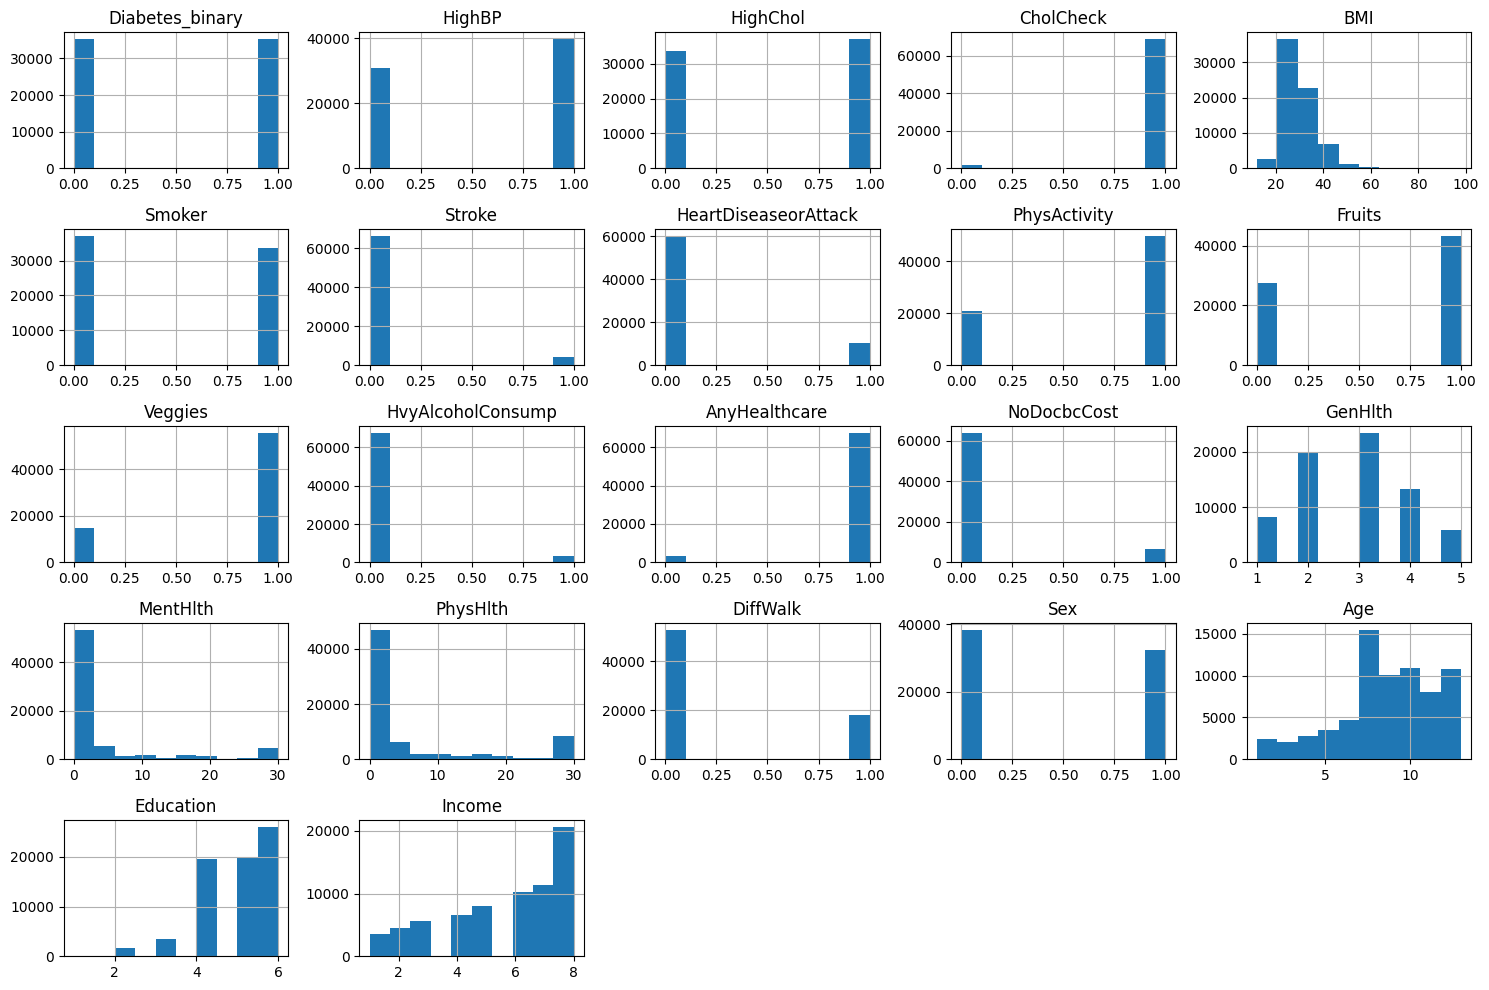

In [10]:
# Distribusi
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

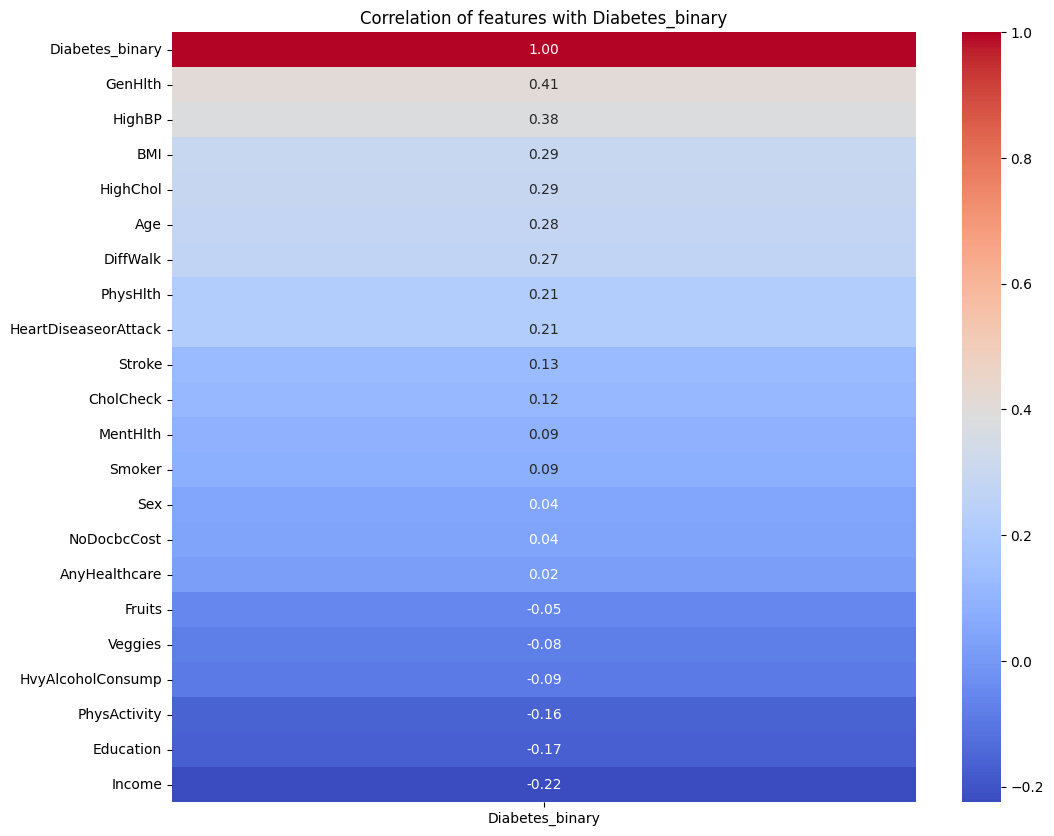

In [11]:
# Cek Korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr()[['Diabetes_binary']].sort_values(by='Diabetes_binary', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of features with Diabetes_binary')
plt.show()

Terlihat bahwa sebagian besar fitur memiliki korelasi yang sangat rendah terhadap fitur target, mengindikasikan bahwa hubungan linear dengan diabetes kemungkinan lemah atau tidak ada. Meski demikian, kolom-kolom tersebut tidak akan dihapus karena masih ada kemungkinan model yang digunakan nantinya dapat menemukan pola yang tidak terdeteksi melalui korelasi linear sederhana.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [12]:
# Standardisasi kolom
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [13]:
# Berikutnya, mengatasi missing value (jika ada, pada dataset ini tidak tapi preprocessing harus sama dengan skrip automate).
for col in df.columns:
    if col in ['BMI', 'MentHlth', 'PhysHlth']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col].fillna(df[col].median(), inplace=True)
    elif col in ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
                 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
                 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                 'DiffWalk', 'Sex', 'GenHlth', 'Age', 'Education', 'Income']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_12592\378986449.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_12592\378986449.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [14]:
# Hapus duplikat
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69057 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       69057 non-null  float64
 1   HighBP                69057 non-null  float64
 2   HighChol              69057 non-null  float64
 3   CholCheck             69057 non-null  float64
 4   BMI                   69057 non-null  float64
 5   Smoker                69057 non-null  float64
 6   Stroke                69057 non-null  float64
 7   HeartDiseaseorAttack  69057 non-null  float64
 8   PhysActivity          69057 non-null  float64
 9   Fruits                69057 non-null  float64
 10  Veggies               69057 non-null  float64
 11  HvyAlcoholConsump     69057 non-null  float64
 12  AnyHealthcare         69057 non-null  float64
 13  NoDocbcCost           69057 non-null  float64
 14  GenHlth               69057 non-null  float64
 15  MentHlth              69

Karena dataset ini tidak memiliki missing value, penanganan missing value tidak diperlukan. Selain itu, normalisasi atau standardisasi juga tidak dilakukan karena model yang akan digunakan tidak sensitif terhadap perbedaan skala fitur.

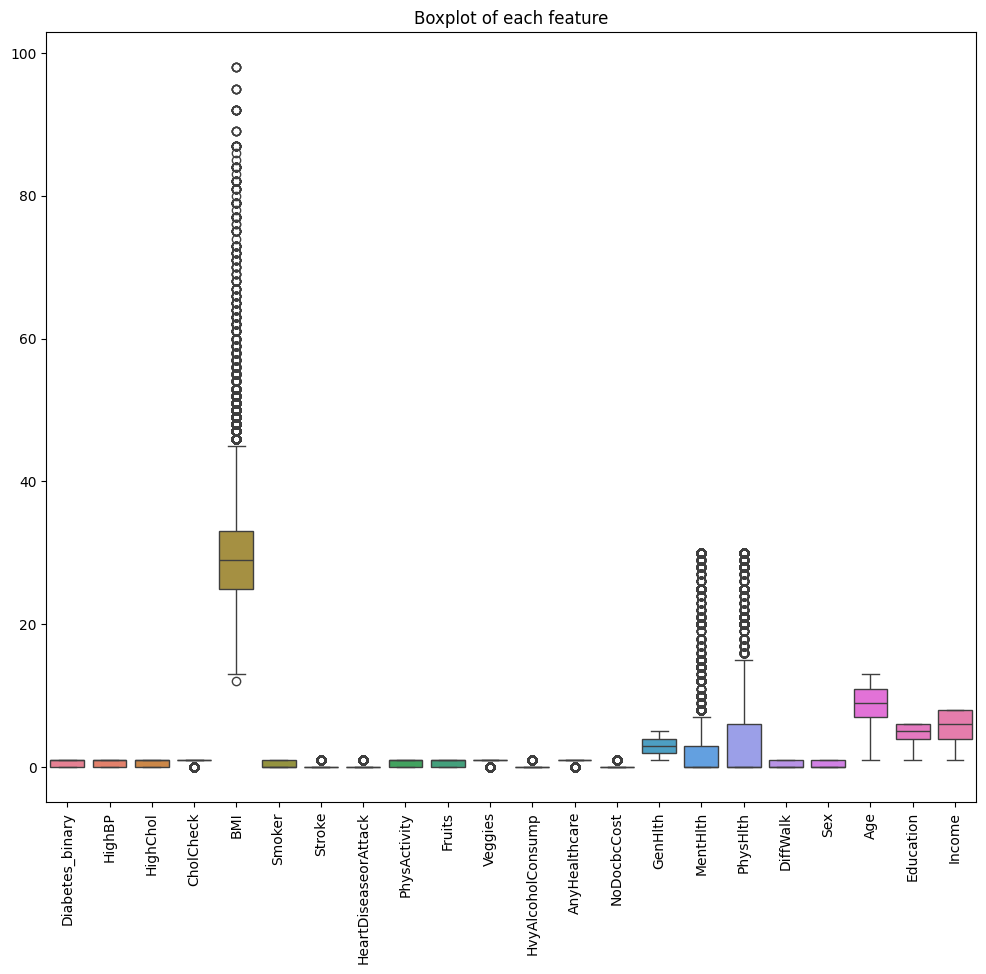

In [15]:
# Cek Outliers
plt.figure(figsize=(12, 10))
sns.boxplot(data=df)
plt.title('Boxplot of each feature')
plt.xticks(rotation=90)
plt.show()

Mengingat data ini berasal dari survei, nilai ekstrem (outlier) dapat merepresentasikan kondisi medis yang spesifik dan berpotensi penting, sehingga dalam proyek ini outlier tidak akan dihapus.

Selain itu, proses encoding dan binning juga tidak dilakukan karena dataset sudah melalui tahapan tersebut sebelumnya.

Sebagai langkah akhir, indeks dataset akan di-reset untuk menghilangkan celah pada urutan indeks dan menjaga konsistensi data.

In [16]:
# Reset dataset index
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69057 entries, 0 to 69056
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       69057 non-null  float64
 1   HighBP                69057 non-null  float64
 2   HighChol              69057 non-null  float64
 3   CholCheck             69057 non-null  float64
 4   BMI                   69057 non-null  float64
 5   Smoker                69057 non-null  float64
 6   Stroke                69057 non-null  float64
 7   HeartDiseaseorAttack  69057 non-null  float64
 8   PhysActivity          69057 non-null  float64
 9   Fruits                69057 non-null  float64
 10  Veggies               69057 non-null  float64
 11  HvyAlcoholConsump     69057 non-null  float64
 12  AnyHealthcare         69057 non-null  float64
 13  NoDocbcCost           69057 non-null  float64
 14  GenHlth               69057 non-null  float64
 15  MentHlth           

Memastikan bahwa seluruh kolom yang bersifat biner telah ter-encode dengan benar. Meskipun dataset ini sudah memenuhi hal tersebut, langkah ini tetap dilakukan untuk konsistensi, terutama saat disesuaikan dengan proses otomatisasi

In [17]:
binary_cols = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
               'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
               'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
               'DiffWalk', 'Sex']
for col in binary_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)
        df[col] = df[col].apply(lambda x: 1 if x > 0 else 0)
     

Pengecekan terhadap kolom yang bersifat ordinal. Meskipun dataset sudah memenuhi syarat ini, langkah ini tetap dilakukan untuk alasan konsistensi, sama seperti pada kolom biner sebelumnya.

In [18]:
# GenHlth
genhlth_mapping = {
    1: 1, 'excellent': 1,
    2: 2, 'very good': 2,
    3: 3, 'good': 3,
    4: 4, 'fair': 4,
    5: 5, 'poor': 5
}
if 'GenHlth' in df.columns:
    if not (df['GenHlth'].dtype in ['int64', 'float64'] and df['GenHlth'].between(1, 5, inclusive='both').all()):
        df['GenHlth'] = df['GenHlth'].map(genhlth_mapping)
        df['GenHlth'] = pd.to_numeric(df['GenHlth'], errors='coerce').fillna(df['GenHlth'].mode()[0]).astype(int)
    df['GenHlth'] = df['GenHlth'].clip(1, 5)

# Education
education_mapping = {
    1: 1, 'never attended school or only kindergarten': 1,
    2: 2, 'elementary': 2,
    3: 3, 'middle school': 3,
    4: 4, 'high school': 4,
    5: 5, 'less than 4 years college': 5,
    6: 6, '4 years college or more': 6
}
if 'Education' in df.columns:
    if not (df['Education'].dtype in ['int64', 'float64'] and df['Education'].between(1, 6, inclusive='both').all()):
        df['Education'] = df['Education'].map(education_mapping)
        df['Education'] = pd.to_numeric(df['Education'], errors='coerce').fillna(df['Education'].mode()[0]).astype(int)
    df['Education'] = df['Education'].clip(1, 6)

Memastikan bahwa beberapa fitur tertentu bertipe numerik dan berada dalam rentang nilai yang sesuai. Meskipun kondisi ini sudah terpenuhi pada dataset, pengecekan tetap dilakukan demi konsistensi, sebagaimana alasan yang sama pada langkah sebelumnya.

In [19]:
# MentHlth dan PhysHlth 
if 'MentHlth' in df.columns:
    df['MentHlth'] = pd.to_numeric(df['MentHlth'], errors='coerce').fillna(df['MentHlth'].median())
    df['MentHlth'] = df['MentHlth'].clip(0, 30).astype(int)

if 'PhysHlth' in df.columns:
    df['PhysHlth'] = pd.to_numeric(df['PhysHlth'], errors='coerce').fillna(df['PhysHlth'].median())
    df['PhysHlth'] = df['PhysHlth'].clip(0, 30).astype(int)

Memeriksa bahwa seluruh kolom bertipe numerik dan menangani segala kemungkinan missing value. Meskipun dataset sudah memenuhi kriteria ini, langkah ini tetap dilakukan untuk menjaga konsistensi, sejalan dengan alasan yang telah disebutkan sebelumnya.

In [20]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    if df[col].isnull().any():
        if col in binary_cols or col in ['GenHlth', 'Age', 'Education', 'Income']:
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)